In [1]:
# Chapter 8)

In [2]:
p <- seq(0, 1, 0.01)
gini.index <- 2 * p * (1 - p)
class.error <- 1 - pmax(p, 1 - p)
cross.entropy <- - (p * log(p) + (1 - p) * log(1 - p))

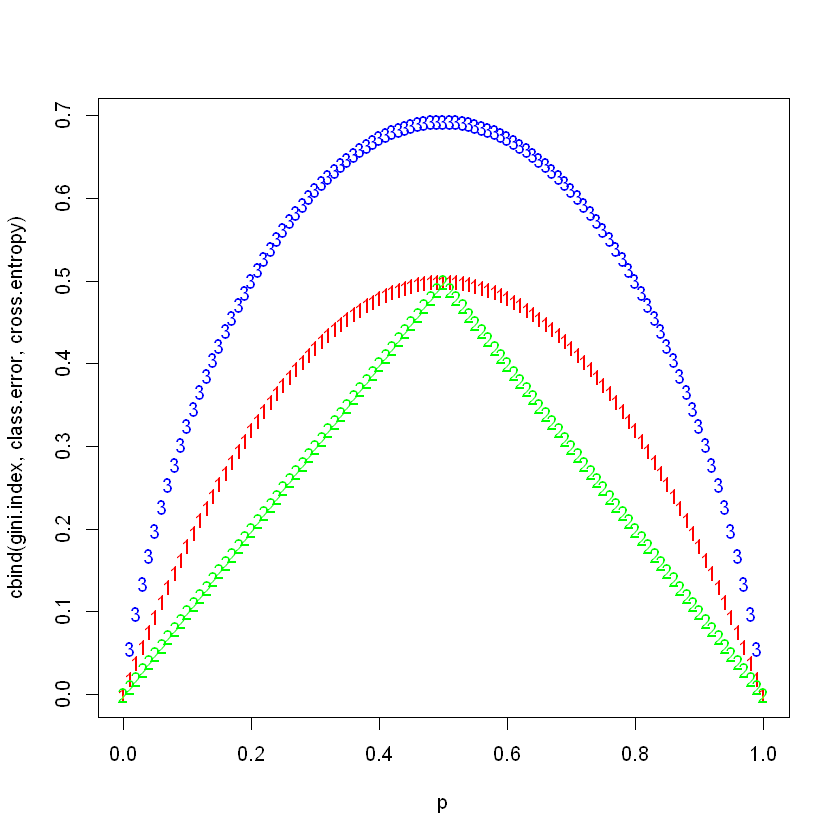

In [3]:
matplot(p, cbind(gini.index, class.error, cross.entropy), col = c("red", "green", "blue"))

In [4]:
#5)

In [5]:
#  1 -> majority vote approach 
#  2 -> classify based on the average probability

# for approach 1 classify X as red as it occures the most among the 10 predictions
# for approach 2 classify X as Green where the 10 probabilities average is 0.45.

In [7]:
#8)

#a)

library(ISLR)
set.seed(1)
train <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
Carseats.train <- Carseats[train, ]
Carseats.test <- Carseats[-train, ]

In [8]:
# b fitting a regression tree) 
library(tree)
tree.carseats <- tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

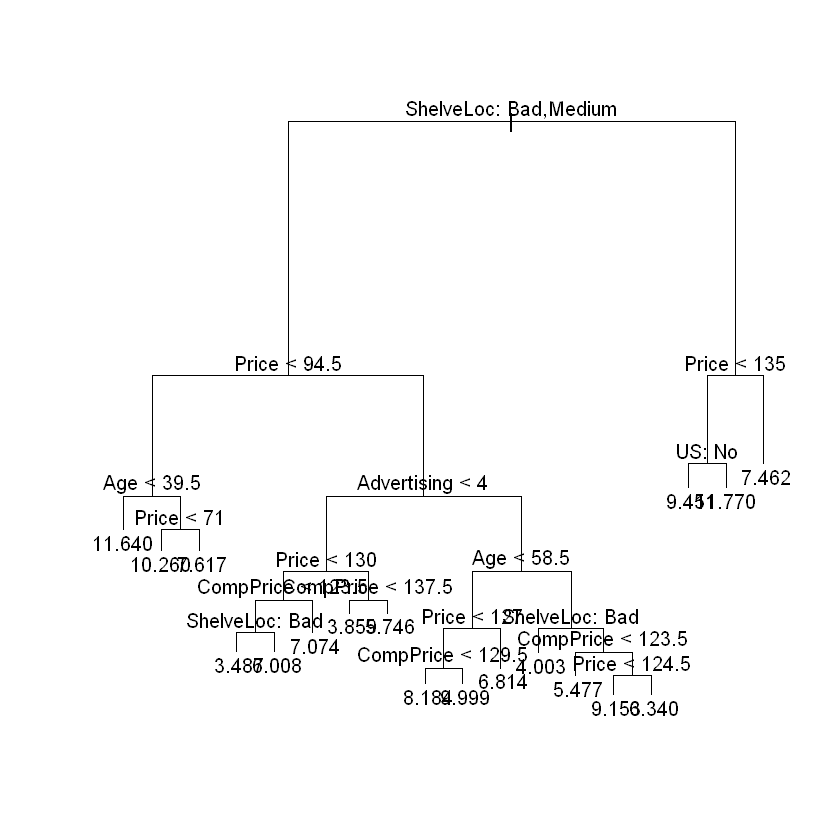

In [9]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [10]:
yhat <- predict(tree.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 4.922039

In [11]:
#C)

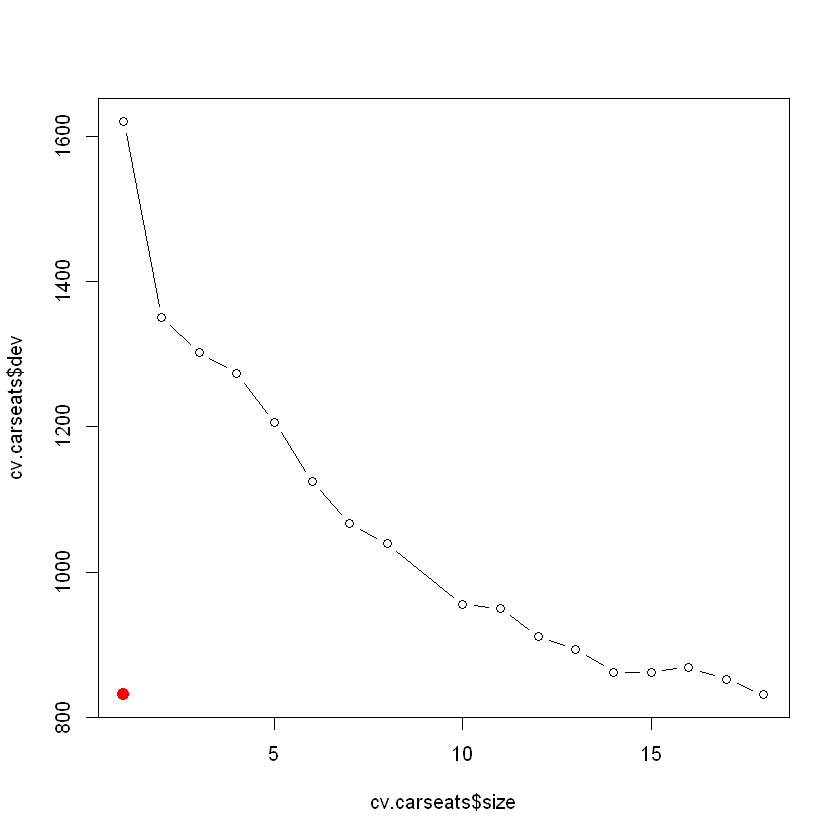

In [12]:
cv.carseats <- cv.tree(tree.carseats)
plot(cv.carseats$size, cv.carseats$dev, type = "b")
tree.min <- which.min(cv.carseats$dev)
points(tree.min, cv.carseats$dev[tree.min], col = "red", cex = 2, pch = 20)

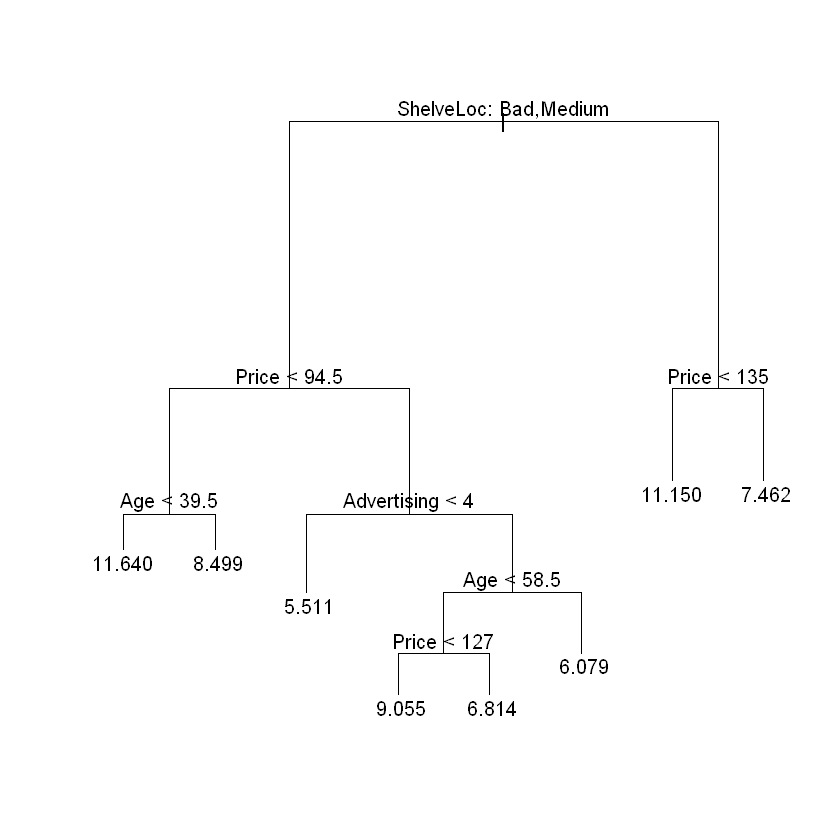

In [13]:
prune.carseats <- prune.tree(tree.carseats, best = 8)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [14]:
yhat <- predict(prune.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 5.113254

In [15]:
#d)

In [28]:
bag.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, importance = TRUE)
yhat.bag <- predict(bag.carseats, newdata = Carseats.test)
mean((yhat.bag - Carseats.test$Sales)^2)

ERROR: Error in randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, : could not find function "randomForest"


In [ ]:
#9)

In [30]:
#a)

set.seed(1)
train <- sample(1:nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

#B)

tree.oj <- tree(Purchase ~ ., data = OJ.train)
summary(tree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [31]:
#C)
tree.oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

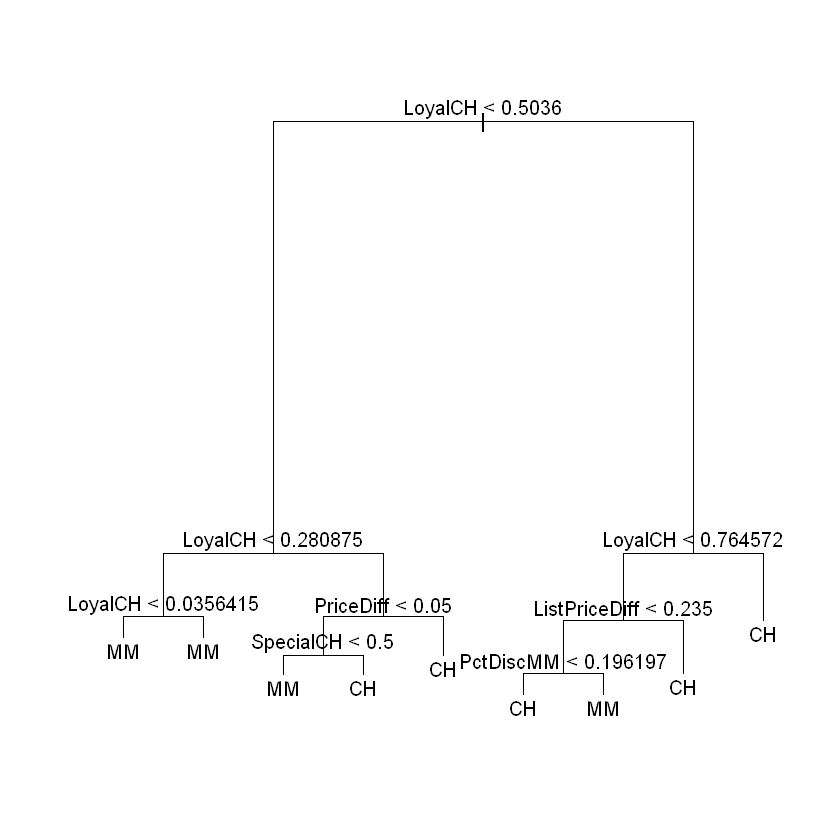

In [32]:
#d)
plot(tree.oj)
text(tree.oj, pretty = 0)

In [33]:
tree.pred <- predict(tree.oj, OJ.test, type = "class")
table(tree.pred, OJ.test$Purchase)

         
tree.pred  CH  MM
       CH 160  38
       MM   8  64

In [34]:
#f optimal size)

cv.oj <- cv.tree(tree.oj, FUN = prune.misclass)
cv.oj

$size
[1] 9 8 7 4 2 1

$dev
[1] 150 150 149 158 172 315

$k
[1]       -Inf   0.000000   3.000000   4.333333  10.500000 151.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

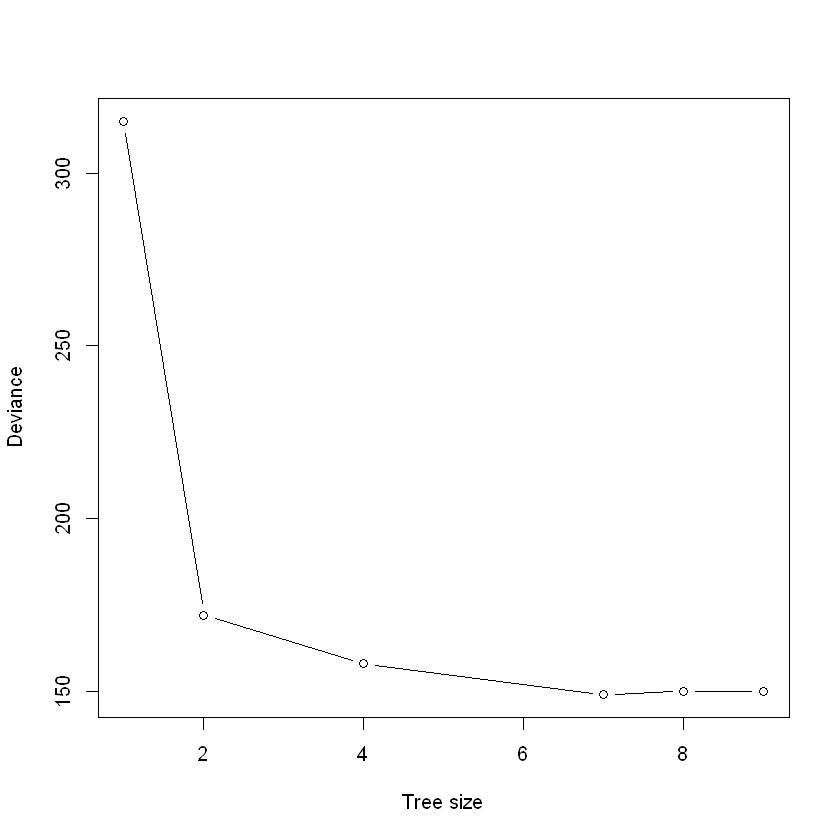

In [35]:
#g plotting)
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree size", ylab = "Deviance")

In [36]:
# nod 6 has the least classification error

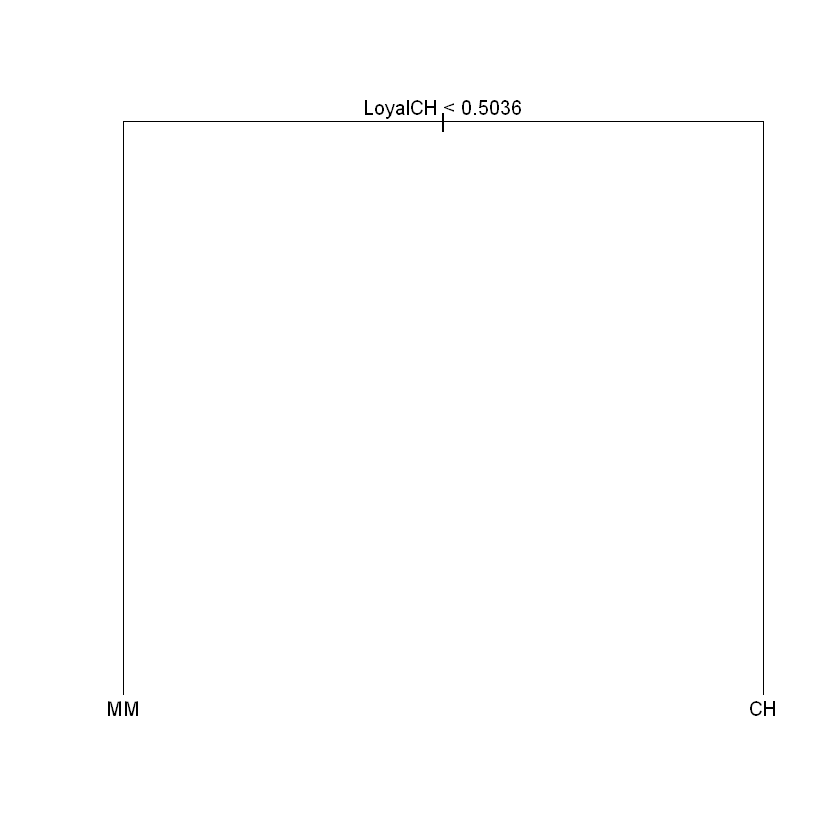

In [37]:
#i)

prune.oj <- prune.misclass(tree.oj, best = 2)
plot(prune.oj)
text(prune.oj, pretty = 0)

In [39]:
#j)
summary(tree.oj)
summary(prune.oj)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 


Classification tree:
snip.tree(tree = tree.oj, nodes = 3:2)
Variables actually used in tree construction:
[1] "LoyalCH"
Number of terminal nodes:  2 
Residual mean deviance:  0.9768 = 779.5 / 798 
Misclassification error rate: 0.205 = 164 / 800 

In [40]:
# 10)

Hitters <- na.omit(Hitters)
Hitters$Salary <- log(Hitters$Salary)

In [41]:
train <- 1:200
Hitters.train <- Hitters[train, ]
Hitters.test <- Hitters[-train, ]

Loaded gbm 2.1.8



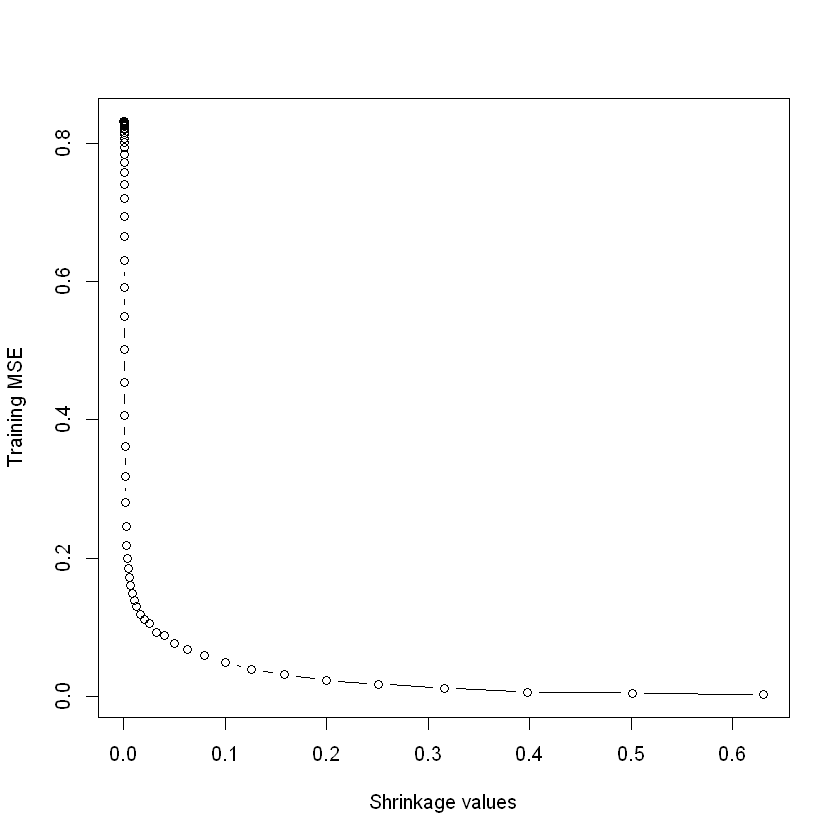

In [42]:
library(gbm)
set.seed(1)
pows <- seq(-10, -0.2, by = 0.1)
lambdas <- 10^pows
train.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    pred.train <- predict(boost.hitters, Hitters.train, n.trees = 1000)
    train.err[i] <- mean((pred.train - Hitters.train$Salary)^2)
}
plot(lambdas, train.err, type = "b", xlab = "Shrinkage values", ylab = "Training MSE")